In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from modules.lane_detection import *
from modules.preprocessing import *
from modules.region_of_interest import *
from modules.line_finding import *
from modules.postprocessing import postprocess
from modules.line_finding import *
from modules.lane_metrics import *

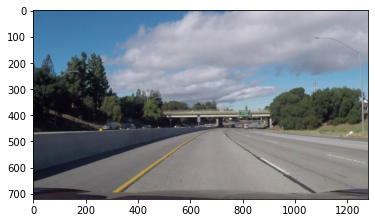

In [11]:
video_reader = cv.VideoCapture("Data/Challenge Video.mp4")
image = video_reader.read()[1]

# image = cv.imread("Data\Images\Test 1.jpg")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [12]:
equalized_image = cv.cvtColor(preprocess(image), cv.COLOR_BGR2HSV)
equalized_image, _ = perspective_transform(equalized_image)


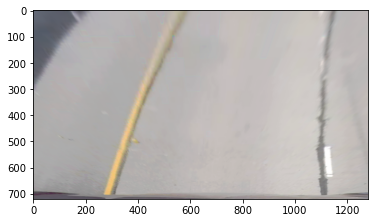

In [13]:
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_HSV2RGB))

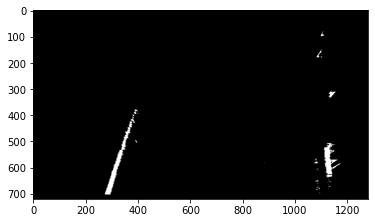

In [14]:
plt.imshow(detect_lanes(equalized_image), cmap = "gray")

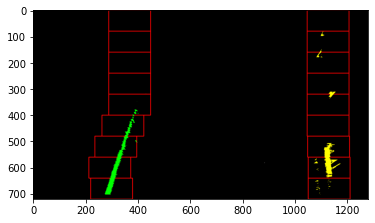

In [15]:
left_fitx, right_fitx, ploty, out_img = fit_polynomial(detect_lanes(equalized_image))
plt.imshow(out_img, cmap = "gray")

In [7]:
def process_frame(image):

    equalized_image = cv.cvtColor(preprocess(image), cv.COLOR_BGR2HSV)
    warped_image, Minv = perspective_transform(equalized_image)
    binary_warped = detect_lanes(warped_image)
    
    left_x, right_x, ploty, _ = fit_polynomial(binary_warped)
    
    left_curvature, right_curvature = measure_curvature(binary_warped)
    center = get_center_distance(binary_warped)
    
    drawn_img = draw_lane(image,binary_warped, left_x, right_x, ploty,Minv)
    drawn_img_with_values = draw_values(drawn_img,left_curvature,right_curvature, center)
    
    return drawn_img_with_values, warped_image, binary_warped

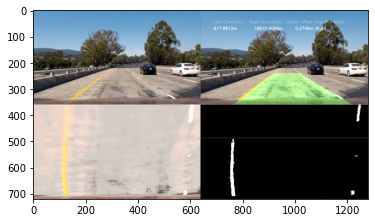

In [8]:
processed_frame, warped_frame, binary_warped_frame = process_frame(image)
debug_frame_upper = np.concatenate((cv.resize(image, (640, 360)), cv.resize(processed_frame, (640, 360))), axis = 1)
binary_warped_frame[binary_warped_frame] = 255
debug_frame_lower = np.concatenate((cv.cvtColor(cv.resize(warped_frame, (640, 360)), cv.COLOR_HSV2BGR), 
                                    cv.cvtColor(cv.resize(binary_warped_frame, (640, 360)), cv.COLOR_GRAY2BGR)), 
                                    axis = 1)
debug_frame = np.concatenate((debug_frame_upper, debug_frame_lower), axis = 0)

plt.imshow(cv.cvtColor(debug_frame, cv.COLOR_BGR2RGB))